(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

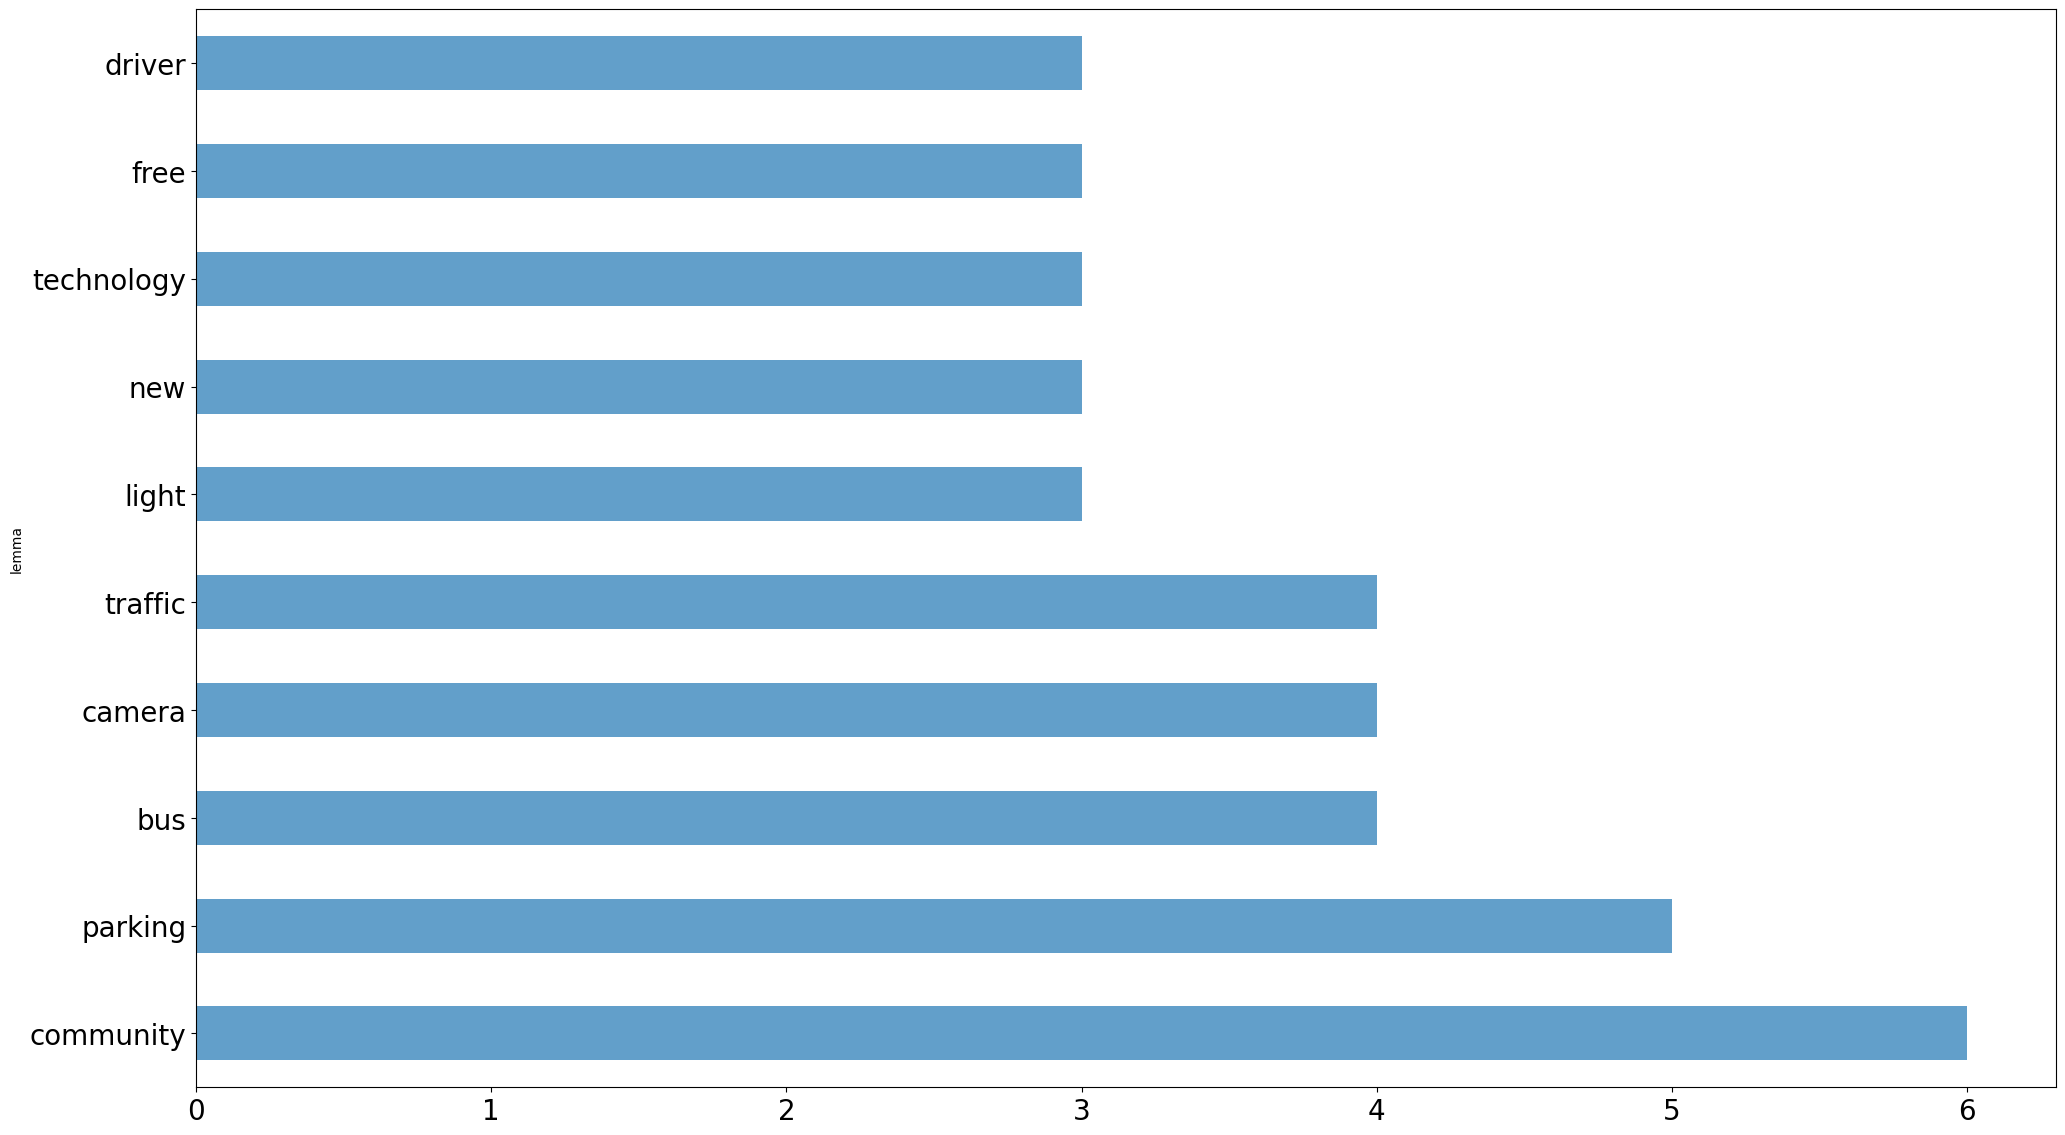

In [17]:
from matplotlib import pyplot as plt
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")
df = pd.read_csv("data/dashboard-export-11-57-pm-2024-11-21.csv")

docs = list(nlp.pipe(df['Q4_11_TEXT - Other, please specify.'].fillna('a'))) # blanks aren't allowed with spacy

def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc"""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_,
         i.dep_, i.pos_, i.is_stop, i.is_alpha,
         i.is_digit, i.is_punct) for i in doc
    ]

def tidy_tokens(docs):
    """Extract tokens and metadata from list of spaCy docs"""

    cols = [
        "doc_id", "token", "token_order", "lemma",
        "ent_type", "tag", "dep", "pos", "is_stop",
        "is_alpha", "is_digit", "is_punct"
    ]

    meta_df = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)

    return pd.concat(meta_df)

tidy_docs = tidy_tokens(docs)

tidy_docs.query("ent_type != ''").ent_type.value_counts()

tidy_docs.query("is_stop == False & is_punct == False").lemma.value_counts().head(10).plot(kind="barh", figsize=(24, 14), alpha=0.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)